In [53]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt 
import seaborn as sns

* Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
* Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


In [3]:
# Load the data

np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

# 1. Standard Scaler

* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

* The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

* xi–mean(x) / stdev(x)

* If data is not normally distributed, this is not the best scaler to use.

In [44]:
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = ['x1','x2','x3'])

Text(0.5, 1.0, 'After Scaling')

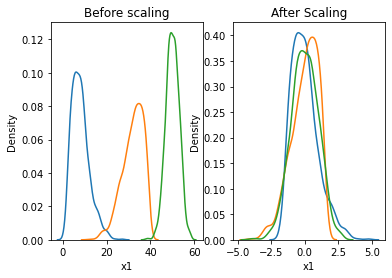

In [45]:
plt.subplot(121)
sns.kdeplot(df['x1'])
sns.kdeplot(df['x2'])
sns.kdeplot(df['x3'])
plt.title('Before scaling')

plt.subplot(122)
sns.kdeplot(scaled_df['x1'])
sns.kdeplot(scaled_df['x2'])
sns.kdeplot(scaled_df['x3'])
plt.title('After Scaling')


# 2. MinMax Scaler

* The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

* xi–min(x) / max(x)–min(x)
* It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

* This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

* However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler 


In [18]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

In [46]:
minmax_scaler = MinMaxScaler()
sc_df = minmax_scaler.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns = ['x1','x2','x3'])

<AxesSubplot:xlabel='x1', ylabel='Density'>

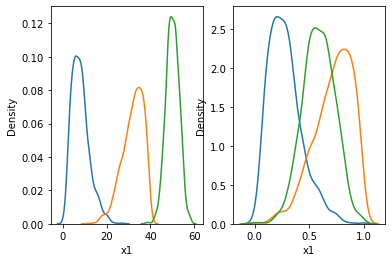

In [47]:
plt.subplot(121)
sns.kdeplot(df['x1'])
sns.kdeplot(df['x2'])
sns.kdeplot(df['x3'])

plt.subplot(122)
sns.kdeplot(sc_df['x1'])
sns.kdeplot(sc_df['x2'])
sns.kdeplot(sc_df['x3'])

# 3. Robust Scaler

* The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, 
rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:

* xi–Q1(x) / Q3(x)–Q1(x)

* For each feature.

* Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.

In [36]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

In [50]:
robust_scaler = RobustScaler()
sc_df_robust = robust_scaler.fit_transform(x)
sc_df_robust = pd.DataFrame(sc_df_robust, columns = ['x1','x2'])

sc_df_minmax = minmax_scaler.fit_transform(x)
sc_df_minmax = pd.DataFrame(sc_df_minmax, columns = ['x1','x2'])

<AxesSubplot:xlabel='x1', ylabel='Density'>

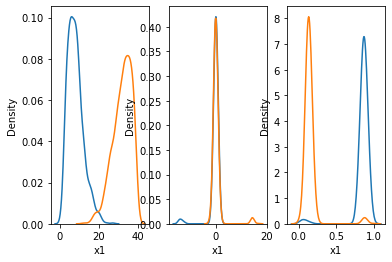

In [51]:
plt.subplot(131)
sns.kdeplot(df['x1'])
sns.kdeplot(df['x2'])

plt.subplot(132)
sns.kdeplot(sc_df_robust['x1'])
sns.kdeplot(sc_df_robust['x2'])

plt.subplot(133)
sns.kdeplot(sc_df_minmax['x1'])
sns.kdeplot(sc_df_minmax['x2'])

# 4. MaxAbs Scaler

* The MaxAbsScaler works very similarly to the MinMaxScaler but automatically scales the data to a [-1,1] range 
based on the absolute maximum. This scaler is meant for data that is already centered at zero or sparse data. 
It does not shift/center the data, and thus does not destroy any sparsity.

* x_scaled = x / max(abs(x))


In [54]:
X = pd.DataFrame(
    np.array([5,7,8, np.NaN, np.NaN, np.NaN, -5,
              0,25,999,1,-1, np.NaN, 0, np.NaN])\
              .reshape((5,3)))
X.columns = ['f1', 'f2', 'f3'] #feature 1, feature 2, feature 3

In [68]:
sc_maxabsscaler = MaxAbsScaler()
scaled_maxabs = sc_maxabsscaler.fit_transform(X)
scaled_maxabs = pd.DataFrame(scaled_maxabs, columns = ['f1', 'f2', 'f3'])

<AxesSubplot:xlabel='f1', ylabel='Density'>

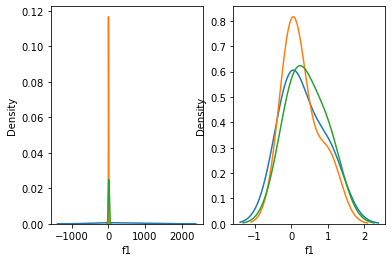

In [69]:
plt.subplot(121)
sns.kdeplot(X['f1'])
sns.kdeplot(X['f2'])
sns.kdeplot(X['f3'])

plt.subplot(122)
sns.kdeplot(scaled_maxabs['f1'])
sns.kdeplot(scaled_maxabs['f2'])
sns.kdeplot(scaled_maxabs['f3'])


